In [1]:
#turn GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

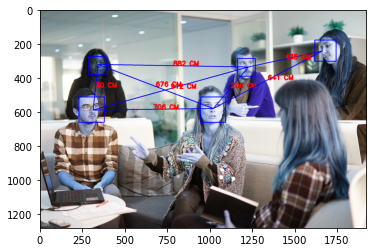

In [2]:
#Using Picture
import cv2
import dlib
import matplotlib.pyplot as plt
img=cv2.imread('people1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
faces=detector(gray)

X=[]
Y=[]
for face in faces:
    x1,x2,y1,y2=face.left(),face.right(),face.top(),face.bottom()
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),3)
    
    landmards=predictor(gray,face)
    X.append(landmards.part(29).x)
    Y.append(landmards.part(29).y)

for i in range(len(X)):
    for j in range(len(X)):
        if i==j :
            pass
        elif abs(X[j]-X[i]) < 1000 :
            cv2.line(img,(X[i],Y[i]),(X[j],Y[j]),(0,0,255),4)
            font=cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(abs(X[j]-X[i]))+" CM",((X[i]+X[j])//2,(Y[i]+Y[j])//2),font,1.25,(255,0,0),5)
            
cv2.imshow('img',img)
plt.imshow(img)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#Using Camera
import cv2
import dlib

detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

cap=cv2.VideoCapture(0)

while cap.isOpened() :
    
    _,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=detector(gray)
    X=[]
    Y=[]
    for face in faces:
        x1,x2,y1,y2=face.left(),face.right(),face.top(),face.bottom()
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),3)
        #cv2.circle(img,(X[0],Y[0]),2,(0,0,255),-1)
        
        landmards=predictor(gray,face)
        X.append(landmards.part(29).x)
        Y.append(landmards.part(29).y)
        
    
    
    for i in range(len(X)):
        for j in range(len(X)):
            if i==j :
                pass
            elif abs(X[j]-X[i]) < 1000 :
                cv2.line(img,(X[i],Y[i]),(X[j],Y[j]),(0,0,255),4)
                font=cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(img,str(abs(X[j]-X[i]))+" CM",((X[i]+X[j])//2,(Y[i]+Y[j])//2),font,1.25,(255,0,0),5)
                
    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
